<a href="https://colab.research.google.com/github/sabitendu/Dog_Breed_Classification/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                         Diabetes Dataset                                      9KB  2022-10-06 08:55:25           2285         66  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset           COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           1965         58  1.0              
evangower/premier-league-matches-19922022                     Premier League Matches 1992-2022                     78KB  2022-10-03 02:18:33            891         38  1.0              
whenamancodes/student-performance                             Student 

In [ ]:
!kaggle competitions download -c dog-breed-identification

 99% 682M/691M [00:07<00:00, 62.7MB/s]
100% 691M/691M [00:07<00:00, 101MB/s] 


In [ ]:
!!unzip dog-breed-identification.zip

['Archive:  dog-breed-identification.zip',
 '  inflating: labels.csv              ',
 '  inflating: sample_submission.csv   ',
 '  inflating: test/000621fb3cbb32d8935728e48679680e.jpg  ',
 '  inflating: test/00102ee9d8eb90812350685311fe5890.jpg  ',
 '  inflating: test/0012a730dfa437f5f3613fb75efcd4ce.jpg  ',
 '  inflating: test/001510bc8570bbeee98c8d80c8a95ec1.jpg  ',
 '  inflating: test/001a5f3114548acdefa3d4da05474c2e.jpg  ',
 '  inflating: test/00225dcd3e4d2410dd53239f95c0352f.jpg  ',
 '  inflating: test/002c2a3117c2193b4d26400ce431eebd.jpg  ',
 '  inflating: test/002c58d413a521ae8d1a5daeb35fc803.jpg  ',
 '  inflating: test/002f80396f1e3db687c5932d7978b196.jpg  ',
 '  inflating: test/0036c6bcec6031be9e62a257b1c3c442.jpg  ',
 '  inflating: test/0041940322116ae58c38130f5a6f71f9.jpg  ',
 '  inflating: test/0042d6bf3e5f3700865886db32689436.jpg  ',
 '  inflating: test/004476c96f575879af4af471af65cae8.jpg  ',
 '  inflating: test/00485d47de966a9437ad3b33ac193b6f.jpg  ',
 '  inflating: test

Get our Workspace ready


In [ ]:
import tensorflow as tf
print("TF Versions", tf.__version__)

TF Versions 2.9.2


In [ ]:
import tensorflow_hub as hub
print("tensorflow",hub.__version__)

tensorflow 0.12.0


In [ ]:
#check if gpu availiable
print("GPU","availiable (YES!!!!)" if tf.config.list_physical_devices("GPU") else "not availiable()" )

GPU not availiable()


In [ ]:
labels_csv=pd.read_csv("labels.csv")

In [ ]:
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


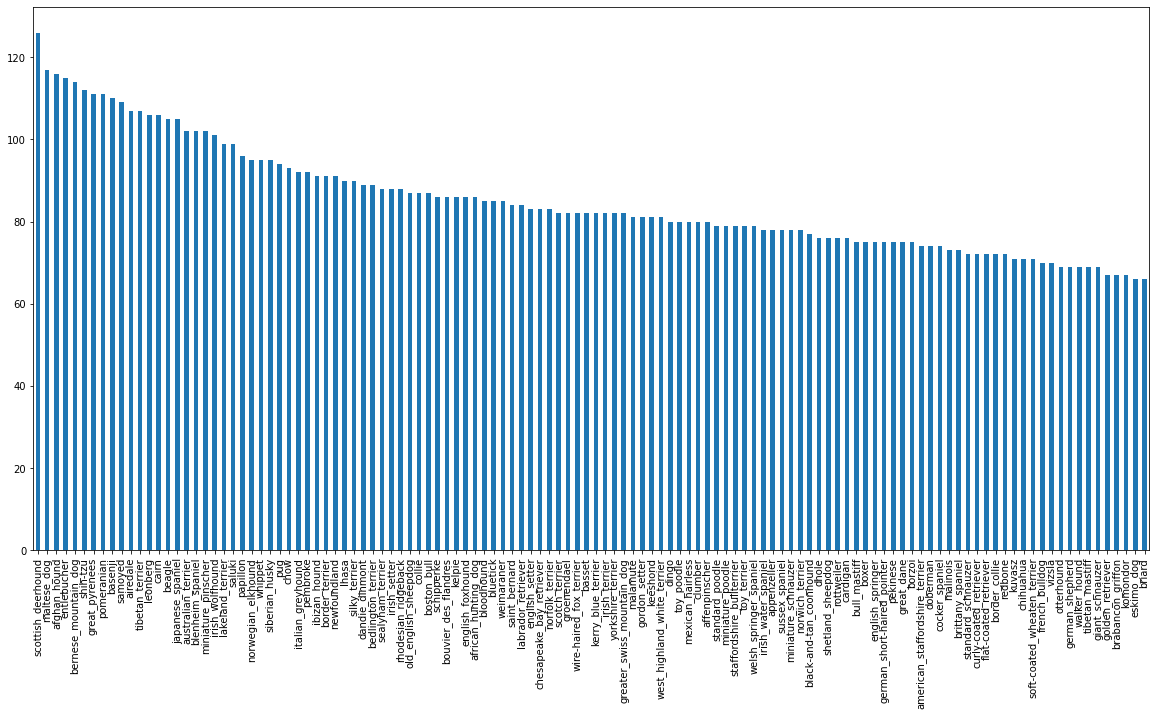

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
from IPython.display import display,Image

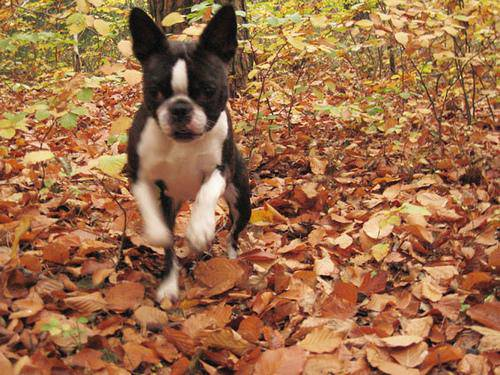

In [ ]:
Image("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
#create pathnames from imageid
filenames=["train/"+ fname + ".jpg" for fname in labels_csv["id"]]
#check the first 10 file names
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("train/"))==len(filenames):
  print("filenames match actual amount of files")
else:
    print("filenames does not mattch,check the target directory")

filenames match actual amount of files


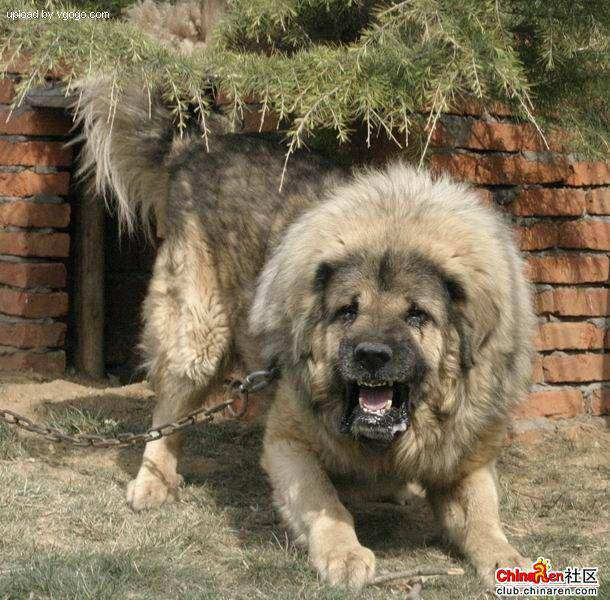

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv.breed[9000]

In [ ]:
labels=labels_csv["breed"].to_numpy()
labels[:10]

In [ ]:
if len(labels)==len(filenames):
  print("number of labels match with filename")
else:
  print("number of labels does not match with filename,check the directory")  

In [ ]:
unique_breeds=np.unique(labels)

NameError: ignored

In [ ]:
len(unique_breeds)

NameError: ignored

In [ ]:
print(labels[0])
labels[0]==unique_breeds

In [ ]:
#turn every label into boolean array
boolean_labels=[label==np.array(unique_breeds) for label in labels]
boolean_labels[:2]

In [ ]:
#turning boolean array into integer
print(labels[0])#original label
print(np.where(unique_breeds==labels[0])[0][0])#index where label occurs
print(boolean_labels[0].argmax())#index where label occurs in boolean array
print(boolean_labels[0].astype(int))#there will be a 1 where sample label occurs

In [ ]:
print(labels[5])#original label
print(np.where(unique_breeds==labels[5])[0][0])#index where label occurs
print(boolean_labels[5].argmax())#index where label occurs in boolean array
print(boolean_labels[5].astype(int))#there will be a 1 where sample label occurs

In [ ]:
X=filenames
y=boolean_labels

Creating our own validation set
since kaggle has not provide any validation set so we have to create our own validation set

In [ ]:
NUM_IMAGES=1000#@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

In [ ]:
#import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(y_train),len(X_val),len(y_val)

In [ ]:
X_train[:2],y_train[:2]

Preprocessing the image



To preprocess our images into Tensors we're going to write a function which does a few things:

1.Takes an image filename as input.

2.Uses TensorFlow to read the file and save it to a variable, image.

3.Turn our image (a jpeg file) into Tensors.

4.Resize the image to be of shape (224, 224).

5.Return the modified image.

In [ ]:
#convert image to numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

In [ ]:
Image(filenames[42])

In [ ]:
image

Convert it into Tensor

In [ ]:
tf.constant(image)[:2]

In [ ]:
# define the image size
IMG_SIZE=224
def process_image(image_path):
  """
  takes an image file path and make it to the tensor
  """
  #read the image file
  image=tf.io.read_file(image_path)
  #turn the jpeg image into numerical Tensor with 3 colour channel(Red,Green,Blue)
  image=tf.image.decode_jpeg(image,channels=3)
  #convert the color channel value from 0-255 to 0-1 value
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resize the image to our desired size
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image  

In [ ]:
#create a simple function to return a tuple
def get_image_label(image_path,label):
   """
   takes an image filepath name and associated label,
   process the image and return a tuple(image,label).
   """
   image=process_image(image_path)
   return image,label


In [ ]:
# demo of the above
get_image_label(X[42],tf.constant(y[42]))


Let's make all our data into batches


Yann Lecunn batchsize=32

In [ ]:
#define batch size
batch_size=32
#create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=batch_size,valid_data=False,test_data=False):
  """
  creates batches of data out of image (X) and label(y) pairs.
  shuffels the data if its training data but doesn't shuffle if itd validation data.
  also accept test data as input(no labels)
  """
  #if the dataset is test dataset,we probably don't have labels
  if test_data:
    print("creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))#only file path no labels
    data_batch=data.map(process_image).batch(batch_size)
    return data_batch
  #if the data is valid,then don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  else:
    print("creating training data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data=data.shuffle(buffer_size=len(X))
    #Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data=data.map(get_image_label)
    #turn the training data into batches
    data_batch=data.batch(batch_size)
  return data_batch    

In [ ]:
# creating training and validation batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [ ]:
# check out different attributes of our data batches
train_data.element_spec,val_data.element_spec

Visulaising data batches
our data is now in batches.However these can be little hard to understand.Let's visualize it

In [ ]:
import matplotlib.pyplot as plt
#create a function for viewing images in data batch
def show_25_images(images,labels):
  """
  displays a plot of 25 images and their label from data batch
  """
  #setup the figure
  plt.figure(figsize=(10,10))
  #loop through 25 images
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    #display an image
    plt.imshow(images[i])
    ##add the image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn off the grid lines
    plt.axis("off")

In [ ]:
train_data

In [ ]:
# now lets visualize the train data
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

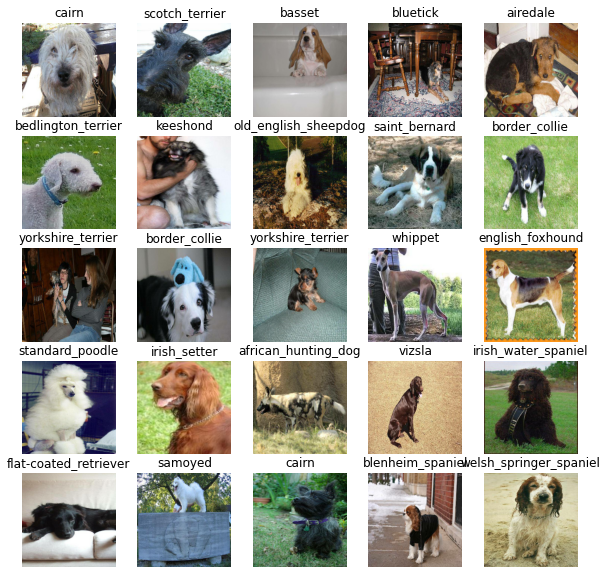

In [ ]:
#lets visualize our valid data
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

**Building a model**

Before we build a model, there are a few things we need to define:

The input shape (our images shape, in the form of Tensors) to our model.

The output shape (image labels, in the form of Tensors) of our model.
The URL of the model we want to use from TensorFlow Hub 

In [ ]:
#set up input shape of the model
IMG_SIZE=224
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
#set up output shape of the model
OUTPUT_SHAPE=len(unique_breeds)
#set up the model url from tensorflow hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters.

Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).

Compiles the model (says it should be evaluated and improved).

Builds the model (tells the model the input shape it'll be getting).

Returns the model.

In [ ]:
#create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("building model with with:", MODEL_URL)
  #setup the model layers
  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL),tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")])
  #compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
  #build the model
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model=create_model()
model.summary()

building model with with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:


Load the TensorBoard notebook extension ✅

Create a TensorBoard callback which is able to save logs to a directory and 

pass it to our model's fit() function. ✅

Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).

In [ ]:
%load_ext tensorboard


In [ ]:
import datetime
#create a function to build a tensorboard callback
def create_tensorboard_callback:
  #create a log directory for storing tensorboard logs
  logdir=os.path.join("logs") 

SyntaxError: ignored